In [85]:
#data pre-processing
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean, median, sin, cos, sqrt, arctan2, radians, std, select, percentile,corrcoef, round
from seaborn import boxplot
from statistics import mode
from datetime import timedelta
import seaborn as sns
import squarify
import numpy as np

In [86]:
df_geo = pd.read_csv('01.geo.csv',
                     sep=';',
                     error_bad_lines=False,
                     engine='python',
                     encoding='unicode_escape')

df_custom = pd.read_csv('02.customers.csv',
                        sep=';',
                        error_bad_lines=False,
                        engine='python',
                        encoding='unicode_escape')

df_sellers = pd.read_csv('03.sellers.csv',
                         sep=';',
                         error_bad_lines=False,
                         engine='python',
                         encoding='unicode_escape')

df_status_ord = pd.read_csv('04.order_status.csv',
                            sep=';',
                            error_bad_lines=False,
                            engine='python')

df_items_ord = pd.read_csv('05.order_items.csv',
                           sep=';',
                           error_bad_lines=False,
                           engine='python')

df_payments_ord = pd.read_csv('06.order_payments.csv',
                              sep=';',
                              error_bad_lines=False,
                              engine='python')

df_prod_reviews = pd.read_csv('07.product_reviews.csv',
                              sep=';',
                              error_bad_lines=False,
                              engine='python')

df_products = pd.read_csv('08.products.csv',
                          sep=';',
                          error_bad_lines=False,
                          engine='python')

After reading the packages it was necessary to merge some tables. 

## Shipping time analysis

I changed the latitude and longitude values into radians using numpy library.

In [87]:
df_geo['geo_latitude']=radians(df_geo.geo_latitude)
df_geo['geo_longitude']=radians(df_geo.geo_longitude)

In [88]:
df_geo_c = df_geo
df_geo_s = df_geo
df_geo_c = df_geo_c.rename(columns = {'geo_latitude':'cust_lat_1','geo_longitude':'cust_lng_1'})
df_geo_s = df_geo_s.rename(columns = {'geo_latitude':'sell_lat_1','geo_longitude':'sell_lng_1'})

df_geo_c['cust_lat']=radians(df_geo_c.cust_lat_1)
df_geo_c['cust_lng']=radians(df_geo_c.cust_lng_1)
df_geo_s['sell_lat']=radians(df_geo_s.sell_lat_1)
df_geo_s['sell_lng']=radians(df_geo_s.sell_lng_1)

Merging togethere datasets about orders.

In [89]:
full_data = pd.merge(left=df_status_ord, right=df_custom, left_on='customer_id', right_on='customer_id')
full_data = full_data.drop(["customer_unique_id"], axis=1)

In [90]:
items_sellers = pd.merge(left=df_items_ord, right=df_sellers, left_on='seller_id', right_on='seller_id')
#items_sellers = items_sellers.drop(["max_shipping_seller_date"], axis=1)

In [91]:
items_sellers.drop(items_sellers[items_sellers['order_item_sequence_id']!=1].index, inplace=True)

In [92]:
full_data = pd.merge(left=full_data, right=items_sellers, left_on='order_id', right_on='order_id')

full_data = pd.merge(left=full_data, right=df_geo_c, how="left",left_on='customer_city', right_on='geo_city')



In [93]:
full_data = pd.merge(left=full_data, right=df_geo_s,how="left",left_on='seller_city', right_on='geo_city')

In [94]:
full_data = full_data.rename(columns = {'geo_city_y':'seller_city'})

In [95]:
full_data= full_data.drop(columns=['sell_lat','sell_lng','cust_lng','cust_lat'])

In [96]:
full_data

,order_id,customer_id,order_status,ts_order_purchase,ts_order_approved,ts_order_delivered_carrier,ts_order_delivered_customer,ts_order_estimated_delivery,customer_autonomous_community,customer_city,...,geo_city_x,cust_lat_1,cust_lng_1,geo_admin1_code_x,geo_autonomous_community_x,seller_city,sell_lat_1,sell_lng_1,geo_admin1_code_y,geo_autonomous_community_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02/10/2018 10:56,02/10/2018 11:07,04/10/2018 19:55,10/10/2018 21:25,18/10/2018 00:00,Comunidad de Madrid,Madrid,...,Madrid,0.705401,-0.064622,29.0,Comunidad de Madrid,Málaga,0.640888,-0.077149,51.0,Andalucía
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24/07/2019 20:41,26/07/2019 03:24,26/07/2019 14:31,07/08/2019 15:27,13/08/2019 00:00,País Vasco,Bilbao,...,Bilbao,0.755077,-0.051056,59.0,País Vasco,Jaén,0.659197,-0.066153,51.0,Andalucía
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08/08/2019 08:38,08/08/2019 08:55,08/08/2019 13:50,17/08/2019 18:06,04/09/2019 00:00,Aragón,Zaragoza,...,Zaragoza,0.727035,-0.015312,52.0,Aragón,Sevilla,0.652453,-0.104251,51.0,Andalucía
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2018 19:28,18/11/2018 19:45,22/11/2018 13:39,02/12/2018 00:28,15/12/2018 00:00,Cataluña,Barcelona,...,Barcelona,0.722371,0.037681,56.0,Cataluña,Madrid,0.705401,-0.064622,29.0,Comunidad de Madrid
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,13/02/2019 21:18,13/02/2019 22:20,14/02/2019 19:46,16/02/2019 18:17,26/02/2019 00:00,Andalucía,Córdoba,...,Córdoba,0.661332,-0.083300,51.0,Andalucía,Jaén,0.659197,-0.066153,51.0,Andalucía
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98706,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,09/03/2018 09:54,09/03/2018 09:54,10/03/2018 11:18,17/03/2018 15:08,28/03/2018 00:00,Andalucía,Huelva,...,Huelva,0.650421,-0.121127,51.0,Andalucía,Jaén,0.659197,-0.066153,51.0,Andalucía
98707,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,06/02/2019 12:58,06/02/2019 13:10,07/02/2019 23:22,28/02/2019 17:37,02/03/2019 00:00,Andalucía,Cádiz,...,Cádiz,0.637512,-0.109766,51.0,Andalucía,Málaga,0.640888,-0.077149,51.0,Andalucía
98708,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,27/08/2018 14:46,27/08/2018 15:04,28/08/2018 20:52,21/09/2018 11:24,27/09/2018 00:00,País Vasco,Bilbao,...,Bilbao,0.755077,-0.051056,59.0,País Vasco,Madrid,0.705401,-0.064622,29.0,Comunidad de Madrid
98709,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,08/01/2019 21:28,08/01/2019 21:36,12/01/2019 15:35,25/01/2019 23:32,15/02/2019 00:00,Cataluña,Tarragona,...,Tarragona,0.717621,0.021817,56.0,Cataluña,Parla,0.702251,-0.065756,29.0,Comunidad de Madrid


In [97]:
full_data = full_data.dropna()

full_data['dLat']=full_data['cust_lat_1']-full_data['sell_lat_1']
full_data['dLng']=full_data['cust_lng_1']-full_data['sell_lng_1']


<ipython-input-97-fb85be3ddae7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data['dLat']=full_data['cust_lat_1']-full_data['sell_lat_1']
<ipython-input-97-fb85be3ddae7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data['dLng']=full_data['cust_lng_1']-full_data['sell_lng_1']


In [98]:
R = 6373.0

# Haversine formula a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
full_data['a'] = sin(full_data.dLat/2)**2 + cos(full_data.cust_lat_1) * cos(full_data.sell_lat_1) * sin(full_data.dLng/2)**2
# c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
full_data['c'] = 2 * arctan2(sqrt(full_data.a), sqrt(1-full_data.a))

full_data['Distance'] = R*full_data.c

conditions = [
(full_data.Distance <= 500),
(full_data.Distance >500) & (full_data.Distance <= 800),
(full_data.Distance > 800) & (full_data.Distance <= 1500),
(full_data.Distance > 1500)]

values = [1,2,3,4]
                                  
full_data['Distance_level'] = select(conditions, values)    
                          

<ipython-input-98-ffd0c673af25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data['a'] = sin(full_data.dLat/2)**2 + cos(full_data.cust_lat_1) * cos(full_data.sell_lat_1) * sin(full_data.dLng/2)**2
<ipython-input-98-ffd0c673af25>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data['c'] = 2 * arctan2(sqrt(full_data.a), sqrt(1-full_data.a))
<ipython-input-98-ffd0c673af25>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [99]:
full_data

,order_id,customer_id,order_status,ts_order_purchase,ts_order_approved,ts_order_delivered_carrier,ts_order_delivered_customer,ts_order_estimated_delivery,customer_autonomous_community,customer_city,...,sell_lat_1,sell_lng_1,geo_admin1_code_y,geo_autonomous_community_y,dLat,dLng,a,c,Distance,Distance_level
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02/10/2018 10:56,02/10/2018 11:07,04/10/2018 19:55,10/10/2018 21:25,18/10/2018 00:00,Comunidad de Madrid,Madrid,...,0.640888,-0.077149,51.0,Andalucía,0.064513,0.012528,0.001064,0.065252,415.850306,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24/07/2019 20:41,26/07/2019 03:24,26/07/2019 14:31,07/08/2019 15:27,13/08/2019 00:00,País Vasco,Bilbao,...,0.659197,-0.066153,51.0,Andalucía,0.095879,0.015097,0.002329,0.096562,615.391574,2
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08/08/2019 08:38,08/08/2019 08:55,08/08/2019 13:50,17/08/2019 18:06,04/09/2019 00:00,Aragón,Zaragoza,...,0.652453,-0.104251,51.0,Andalucía,0.074582,0.088939,0.002563,0.101300,645.584319,2
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2018 19:28,18/11/2018 19:45,22/11/2018 13:39,02/12/2018 00:28,15/12/2018 00:00,Cataluña,Barcelona,...,0.705401,-0.064622,29.0,Comunidad de Madrid,0.016970,0.102303,0.001565,0.079146,504.399934,2
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,13/02/2019 21:18,13/02/2019 22:20,14/02/2019 19:46,16/02/2019 18:17,26/02/2019 00:00,Andalucía,Córdoba,...,0.659197,-0.066153,51.0,Andalucía,0.002135,-0.017147,0.000047,0.013711,87.378084,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98706,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,09/03/2018 09:54,09/03/2018 09:54,10/03/2018 11:18,17/03/2018 15:08,28/03/2018 00:00,Andalucía,Huelva,...,0.659197,-0.066153,51.0,Andalucía,-0.008776,-0.054974,0.000494,0.044475,283.440615,1
98707,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,06/02/2019 12:58,06/02/2019 13:10,07/02/2019 23:22,28/02/2019 17:37,02/03/2019 00:00,Andalucía,Cádiz,...,0.640888,-0.077149,51.0,Andalucía,-0.003376,-0.032616,0.000174,0.026393,168.203419,1
98708,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,27/08/2018 14:46,27/08/2018 15:04,28/08/2018 20:52,21/09/2018 11:24,27/09/2018 00:00,País Vasco,Bilbao,...,0.705401,-0.064622,29.0,Comunidad de Madrid,0.049676,0.013566,0.000642,0.050693,323.065017,1
98709,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,08/01/2019 21:28,08/01/2019 21:36,12/01/2019 15:35,25/01/2019 23:32,15/02/2019 00:00,Cataluña,Tarragona,...,0.702251,-0.065756,29.0,Comunidad de Madrid,0.015370,0.087572,0.001161,0.068160,434.380617,1


### Data exploration
I deleted all records which didn’t have the status ‘delivered’ to leave only those deliveries which actually reached the end customers.

In [100]:
full_data.drop(full_data[full_data['order_status']!='delivered'].index, inplace=True)

/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Next, I calculated the actual delivery time, the estimated delivery time and the difference between those two presenting the values in days. To deal with cases where delivery was faster than 24h I decided to set the minimum delivery time as 1 day.

In [101]:
#Delivery Actual Time
full_data["Del_act_time"]=(pd.to_datetime(full_data["ts_order_delivered_customer"])- pd.to_datetime(full_data["ts_order_purchase"])).astype('timedelta64[D]')
full_data["Del_act_time"] = full_data["Del_act_time"].replace(0,1)

<ipython-input-101-50788b8b2256>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data["Del_act_time"]=(pd.to_datetime(full_data["ts_order_delivered_customer"])- pd.to_datetime(full_data["ts_order_purchase"])).astype('timedelta64[D]')
<ipython-input-101-50788b8b2256>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data["Del_act_time"] = full_data["Del_act_time"].replace(0,1)


In [102]:
print("min: ", round(min(full_data.Del_act_time)),
      "max: ", round(max(full_data.Del_act_time)),
      "mode: ", round(mode(full_data.Del_act_time)),
      "avg: ", round(mean(full_data.Del_act_time)),
      "standard deviation: ", round(std(full_data.Del_act_time)),
      "median: ", round(median(full_data.Del_act_time)))

min:  -334.0 max:  688.0 mode:  7.0 avg:  13.0 standard deviation:  119.0 median:  8.0


(array([2.3740e+03, 9.6490e+03, 1.1842e+04, 4.9056e+04, 1.1827e+04,
        8.2470e+03, 1.3560e+03, 8.2000e+01, 4.1000e+01, 1.0000e+01]),
 array([-334. , -231.8, -129.6,  -27.4,   74.8,  177. ,  279.2,  381.4,
         483.6,  585.8,  688. ]),
 <BarContainer object of 10 artists>)

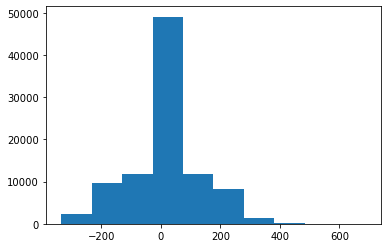

In [103]:
plt.hist(full_data.Del_act_time)

/Users/marcomartinese/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Del_act_time'>

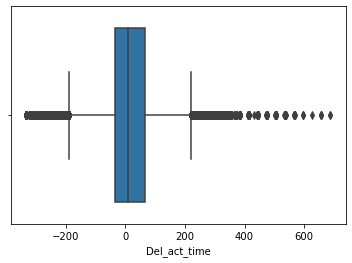

In [104]:
boxplot(full_data.Del_act_time)

In [105]:
#Delivery estimated time
full_data["Del_est_time"]=(pd.to_datetime(full_data["ts_order_estimated_delivery"])- pd.to_datetime(full_data["ts_order_purchase"])).astype('timedelta64[D]')

<ipython-input-105-4a67ad88a5e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data["Del_est_time"]=(pd.to_datetime(full_data["ts_order_estimated_delivery"])- pd.to_datetime(full_data["ts_order_purchase"])).astype('timedelta64[D]')


In [106]:
print("min: ", round(min(full_data.Del_est_time)),
    "max: ", round(max(full_data.Del_est_time)),
    "mode: ", round(mode(full_data.Del_est_time)),
    "avg: ", round(mean(full_data.Del_est_time)),
    "standard deviation: ", round(std(full_data.Del_est_time)),
    "median: ", round(median(full_data.Del_est_time)))

min:  -334.0 max:  687.0 mode:  22.0 avg:  22.0 standard deviation:  118.0 median:  24.0


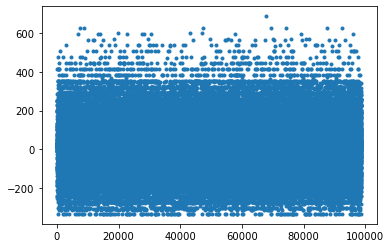

In [107]:
plt.plot(full_data.Del_est_time, '.')

(array([2.1410e+03, 7.6980e+03, 1.3042e+04, 5.0075e+04, 1.2422e+04,
        6.4210e+03, 2.1410e+03, 4.1900e+02, 1.0400e+02, 2.1000e+01]),
 array([-334. , -231.9, -129.8,  -27.7,   74.4,  176.5,  278.6,  380.7,
         482.8,  584.9,  687. ]),
 <BarContainer object of 10 artists>)

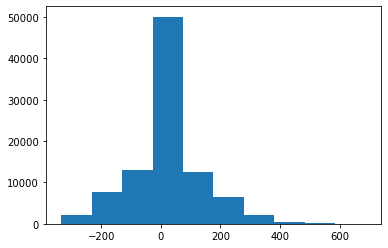

In [108]:
plt.hist(full_data.Del_est_time)

In [109]:
#Difference between actual and estimated delivery time
full_data["Diff_act_est"]=(pd.to_datetime(full_data["ts_order_estimated_delivery"])- pd.to_datetime(full_data["ts_order_delivered_customer"])).astype('timedelta64[D]')

<ipython-input-109-23c431f77fc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data["Diff_act_est"]=(pd.to_datetime(full_data["ts_order_estimated_delivery"])- pd.to_datetime(full_data["ts_order_delivered_customer"])).astype('timedelta64[D]')


In [110]:
full_data[["Diff_act_est"]]

,Diff_act_est
0,7.0
1,35.0
2,-131.0
3,305.0
4,9.0
...,...
98706,10.0
98707,-26.0
98708,5.0
98709,20.0


In [111]:
print("min: ", round(min(full_data.Diff_act_est)),
    "max: ", round(max(full_data.Diff_act_est)),
    "mode: ", round(mode(full_data.Diff_act_est)),
    "avg: ", round(mean(full_data.Diff_act_est)),
    "standard deviation: ", round(std(full_data.Diff_act_est)),
    "median: ", round(median(full_data.Diff_act_est)))

min:  -348.0 max:  536.0 mode:  6.0 avg:  9.0 standard deviation:  116.0 median:  9.0


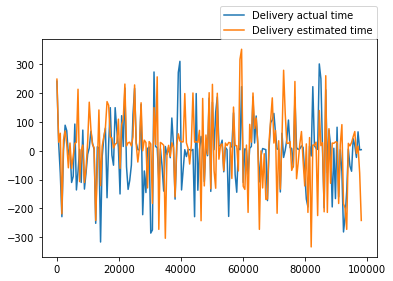

In [112]:
plt.plot(full_data['Del_act_time'][::500], label='Delivery actual time')
plt.plot(full_data['Del_est_time'][::500], label='Delivery estimated time')
plt.legend(bbox_to_anchor=(1, 1), loc='lower right', borderaxespad=0.)
plt.show()

In [113]:
#add new columns support for analysis
full_data = full_data.assign(
    order_delivered_customer_date = pd.to_datetime(full_data["ts_order_delivered_customer"]).dt.date,
    order_delivered_carrier_date = pd.to_datetime(full_data["ts_order_delivered_carrier"]).dt.date)

In [114]:
full_data = full_data.assign(
    order_estimated_delivery_date = pd.to_datetime(full_data["ts_order_estimated_delivery"]).dt.date,
    shipping_limit_date = pd.to_datetime(full_data["max_shipping_seller_date"]).dt.date)

In [115]:
full_data= full_data.assign(days_est_vs_deliver= (full_data['order_estimated_delivery_date'] - full_data['order_delivered_customer_date']).dt.days
                                 ,days_limit_vs_deliver_carrier= (full_data['shipping_limit_date'] - full_data['order_delivered_carrier_date']).dt.days)

full_data=full_data.assign(seller_to_carrier=np.where(full_data['days_limit_vs_deliver_carrier']<0,'late deliver to carrier','in time deliver to carrier'))


In [116]:
full_data=full_data.assign(seller_to_carrier=np.where(full_data['days_limit_vs_deliver_carrier']<0,'late deliver to carrier','in time deliver to carrier'))


In [117]:
# create a column with condition: 
full_data['est_to_deliver'] = np.where(full_data['Diff_act_est']<0, 'late deliver', 'on time deliver')

conditions = [(full_data['Diff_act_est'] < -10),
              (full_data['Diff_act_est'] <= -5),
              (full_data['Diff_act_est'] < 0)]
choices = ['late over 10 days', 'late from 5 days to 10 days','late under 5 days']
full_data['est_to_deliver_detail'] = np.select(conditions, choices, default='on time deliver')

#merge with reviews dataset:
#in case, reviews dataset has 2 reviews by orders => get avg score for each order:
reviews_unique = df_prod_reviews.pivot_table(values='review_score', index='order_id', aggfunc = 'mean')
reviews_unique.reset_index(inplace=True)
full_data=full_data.merge(reviews_unique[['order_id','review_score']], how="left", on ='order_id')

#remove duplicated line for same products in 1 order:
#reason: if customers purchased 2 same products in 1 order, data presented as 2 lines with same delivery information,
#therefore need to remove duplicates before calculate deliver performance
deliver_df=full_data.drop_duplicates(keep=False,inplace=False)


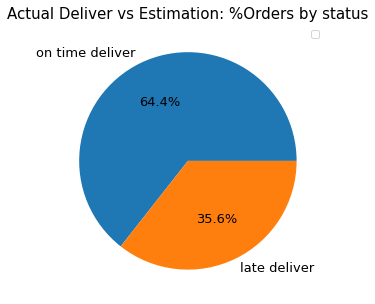

In [118]:
###Deliver vs estimation###
#calculate no of orders by days variance bw estimation to actual deliver:
dlv_df=deliver_df[['order_id','est_to_deliver']]
dlv=dlv_df.pivot_table(values='order_id',index='est_to_deliver', aggfunc='nunique')
dlv.sort_values(by='order_id', ascending=False, inplace=True)

# present data to chart:
dlv.plot.pie(y='order_id', labels=dlv.index, autopct='%1.1f%%',textprops={'fontsize': 13},figsize=(5, 5))
plt.title('Actual Deliver vs Estimation: %Orders by status', size = 15)
plt.ylabel('')
plt.legend('')
plt.savefig('Actual Deliver vs Estimation: %Orders by status', dpi=400, bbox_inches='tight');

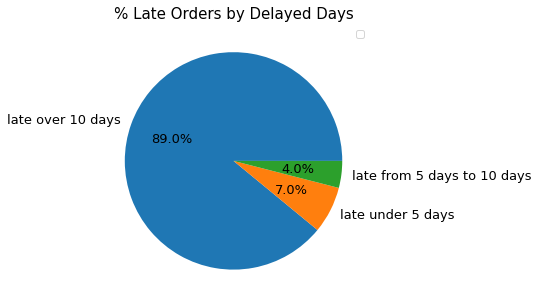

In [119]:
###create df of late deliver orders only ###
late_deliver_df=deliver_df[deliver_df['est_to_deliver']=='late deliver']
late_deli_status=late_deliver_df.pivot_table(values='order_id',index='est_to_deliver_detail', aggfunc='nunique')
late_deli_status.sort_values(by='order_id', ascending=False, inplace=True)

# present data to chart:
late_deli_status.plot.pie(y='order_id', labels=late_deli_status.index, autopct='%1.1f%%',textprops={'fontsize': 13},figsize=(5, 5))
plt.title('% Late Orders by Delayed Days', size = 15)
plt.ylabel('')
plt.legend('')
plt.savefig('Late Orders by Delayed Days', dpi=400, bbox_inches='tight');

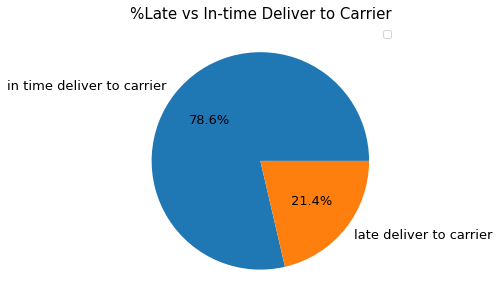

In [120]:
###Percentage of late deliver to carrier###

#count unique orders by "est_to_deliver" = "late deliver"
late_deliver=late_deliver_df.pivot_table(values='order_id',index='est_to_deliver', aggfunc='nunique')
late_deliver.rename(columns={'order_id':'unique_orders'}, inplace=True)

#count unique orders by "seller_to_carrier"= "late deliver to carrier"
late_to_carrier=deliver_df[deliver_df['est_to_deliver']=='late deliver'].pivot_table(values='order_id',index='est_to_deliver', columns = 'seller_to_carrier', aggfunc='nunique')
deliver_to_carrier = late_deliver.merge(late_to_carrier, how = "left", on = 'est_to_deliver')

#1 order may have many different products delivered by different sellers to carrier,
#so if only 1 products late deliverd to carrier, we determined that order will be counted as late deliverd to carrier
#that is the reason why need to recalculate no of orders in time delivered to carrier = unique orders - late delivered to carrier orders
deliver_to_carrier.drop(columns='in time deliver to carrier')
deliver_to_carrier['in time deliver to carrier'] = deliver_to_carrier['unique_orders'] - deliver_to_carrier['late deliver to carrier']

deliver_to_carrier.drop(columns='unique_orders',inplace=True)
deli_to_carrier=deliver_to_carrier.T

# present data to chart:
deli_to_carrier.plot.pie(y='late deliver', labels=deli_to_carrier.index, autopct='%1.1f%%',textprops={'fontsize': 13},figsize=(5, 5))
plt.title('%Late vs In-time Deliver to Carrier', size = 15)
plt.ylabel('')
plt.legend('')
plt.savefig('%Late vs In-time Deliver to Carrier', dpi=400, bbox_inches='tight');


Conclusion:

- Company has quite good delivery performance with 35.6% late delivery vs estimation. However, in the late delivered orders, over 89% of orders late delivered over 10 days vs estimation.
- For late delivery, only 21.4% orders is because sellers late delivered to carrier, 78.6% sellers in time delivered to carrier.

In [121]:
### in all orders: which sellers most deliverPercentage of late orders per seller ###
#count unique orders by seller
seller=deliver_df[['seller_id','seller_to_carrier','order_id']]
seller_pv=seller.pivot_table(values='order_id',index='seller_id', aggfunc='nunique')
seller_pv.reset_index(inplace=True)
seller_pv.rename(columns={"order_id": "unique_order"}, inplace=True)

#count late orders by seller
seller_late_deliver=seller[seller.seller_to_carrier=='late deliver to carrier']
seller_late_deli = seller_late_deliver.drop_duplicates()
seller_late=seller_late_deli.pivot_table(values='order_id',index='seller_id', aggfunc='nunique')
seller_late.reset_index(inplace=True)
seller_late.rename(columns={"order_id": "late_order"}, inplace=True)

#calculate %late orders by seller
seller_summary=seller_pv.merge(seller_late, how="left", on='seller_id')
seller_summary.fillna(0, inplace=True)
seller_summary["percent_late_order"]=seller_summary.late_order*100/seller_summary.unique_order
seller_summary.sort_values("percent_late_order", ascending=False, inplace=True)
seller_summary.head(20)

#get avg orders per seller:
avg_ord_per_seller = pd.DataFrame(seller_pv.mean(numeric_only=True))
avg_ord_per_seller.reset_index(inplace=True)

#get seller with most %late order with 2 conditions: no of orders >= avg orders per seller & high %late orders:
seller_top=seller_summary[seller_summary['unique_order']>=avg_ord_per_seller.iloc[0,1]]
seller_top = seller_top.sort_values("percent_late_order", ascending=False)
seller_top_10 = seller_top.head(10)
seller_top_10.set_index('seller_id', inplace=True)

seller_top_10.columns.names = ['']
seller_top_styled = seller_top_10.style.background_gradient()
seller_top_styled

,unique_order,late_order,percent_late_order
seller_id,,,
48efc9d94a9834137efd9ea76b065a38,33,29.000000,87.878788
0ed6ce5d87fd9c69eaacaeb778d67235,41,24.000000,58.536585
835f0f7810c76831d6c7d24c7a646d4d,41,23.000000,56.097561
ad781527c93d00d89a11eecd9dcad7c1,35,18.000000,51.428571
88460e8ebdecbfecb5f9601833981930,238,117.000000,49.159664
75d34ebb1bd0bd7dde40dd507b8169c3,57,27.000000,47.368421
7a241947449cc45dbfda4f9d0798d9d0,55,26.000000,47.272727
54965bbe3e4f07ae045b90b0b8541f52,71,33.000000,46.478873
6fd52c528dcb38be2eea044946b811f8,67,31.000000,46.268657


Here is the id list of sellers that have highest percentage of late deliver orders. Company needs to pay attention to these sellers if they want to increase customer satisfaction.
